Group Project

In [3]:
!pip install tensorflow

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2

import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

trainingset = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/fer2013/fer2013_training_onehot.csv', delimiter=',')
testingset = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/fer2013/fer2013_publictest_onehot.csv', delimiter=',')

print(trainingset.shape)  # Check if it loaded correctly

Mounted at /content/drive
(28709, 2311)


In [6]:
n_inputs = 2304  # 48x48 flattened image
n_classes = 7  # 7 emotion classes
img_dim = 48  # Image size (48x48)

# Splitting input (X) and labels (Y)
x_training = trainingset[:, 0:n_inputs]
y_training = trainingset[:, n_inputs:n_inputs + n_classes]

x_testing = testingset[:, 0:n_inputs]
y_testing = testingset[:, n_inputs:n_inputs + n_classes]

# Reshape to (num_samples, 48, 48)
x_training = x_training.reshape(x_training.shape[0], 48, 48)
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48)

# Add a channel dimension to match CNN input shape (num_samples, 48, 48, 1)
x_training = np.expand_dims(x_training, axis=3)
x_testing = np.expand_dims(x_testing, axis=3)

print(x_training.shape)  # Should output (num_samples, 48, 48, 1)
print(x_testing.shape)   # Should output (num_samples, 48, 48, 1)


(28709, 48, 48, 1)
(3589, 48, 48, 1)


In [7]:
def get_emotion(ohv):
    if ohv.shape[0] == 1:
        indx = ohv[0]
    else:
        indx = np.argmax(ohv)

    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

In [27]:
def get_emotion(ohv):
    if isinstance(ohv, np.ndarray):  # Check if it's an array
        if ohv.shape == (1,):  # Single value
            indx = ohv[0]
        else:  # One-hot vector
            indx = np.argmax(ohv)
    else:  # If not an array, assume it's already an index
        indx = ohv

    emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
    return emotions[indx] if 0 <= indx < len(emotions) else "Unknown"

(28709, 48, 48, 1)
(28709, 7)
(3589, 48, 48, 1)
(3589, 7)


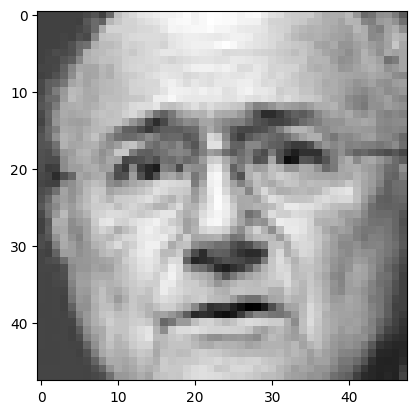

facial emotion: fear


In [8]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sample = x_training[5, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[5, :]))

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape = (48, 48, 1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(Conv2D(64, (3, 3), activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [13]:
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

In [14]:
model.add(Conv2D(128, (3, 3), activation='relu'))

In [15]:
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

In [16]:
model.add(Conv2D(256, (3, 3), activation='relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [18]:
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

Compile Model

In [19]:
opt = Adam(learning_rate=0.0001, weight_decay=10e-6)  # Correct parameters
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model Fitting

In [21]:
batch_size = 64  # Instead of 8
n_epoches = 25

early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Lower patience

opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(x_training, y_training, batch_size=batch_size, epochs=n_epoches,
          validation_data=(x_testing, y_testing), shuffle=True,
          validation_freq=5,  # Less validation overhead
          callbacks=[early_stopping])

Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.6163 - loss: 1.2291
Epoch 2/25
  2/449 ━━━━━━━━━━━━━━━━━━━━ 32s 73ms/step - accuracy: 0.6289 - loss: 1.2210

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.6488 - loss: 1.1332
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.6949 - loss: 1.0398
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.7478 - loss: 0.9303
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 63ms/step - accuracy: 0.7918 - loss: 0.8622 - val_accuracy: 0.6127 - val_loss: 1.4342
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.8391 - loss: 0.7723
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.8693 - loss: 0.7058
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8929 - loss: 0.6656
Epoch 9/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.9092 - loss: 0.6390
Epoch 10/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.9237 - loss: 0.6132 - val_accuracy: 0.6236 - val_loss: 1.8214
Epoch 11/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.9320 - loss: 0.6002
Epoch 12/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 42s 

Model Evaluation

In [22]:
scores = model.evaluate(x_testing, y_testing)
print('%s: %.2f%%'% (model.metrics_names[1], scores[1]*100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6279 - loss: 2.1308
compile_metrics: 61.88%


In [23]:
scores = model.evaluate(x_testing, y_testing)
print('%s: %.2f%%'% (model.metrics_names[1], scores[1]*100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6279 - loss: 2.1308
compile_metrics: 61.88%


Test Train Model

In [27]:
# 2163
img_indx = np.uint32(np.random.rand()*(testingset.shape[0] - 1))
sample = x_testing[img_indx, :]
sample = sample.reshape(48, 48)

pred_cls = model.predict_classes(sample.reshape(1, 48, 48, 1))

plt.imshow(sample, cmap='gray')
plt.show()
print('> testing image index: %d\n> true emotion: %s\n> predicted emotion: %s' % (img_indx, get_emotion(y_testing[img_indx, :]), get_emotion(pred_cls)))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Shape of pred_prob: (1, 7)
Predicted class: [0]


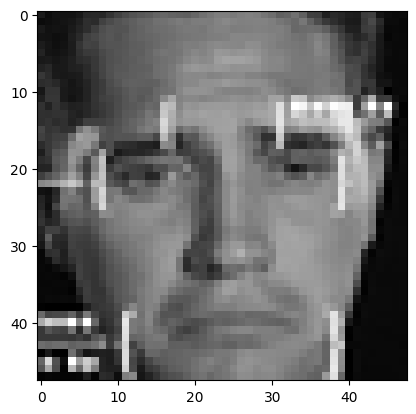

> Testing image index: 2684
> True emotion: Sad
> Predicted emotion: Angry


In [28]:
# Select a random test image
img_indx = np.uint32(np.random.rand() * (testingset.shape[0] - 1))
sample = x_testing[img_indx, :]
sample = sample.reshape(48, 48)

# Predict class (new method)
pred_prob = model.predict(sample.reshape(1, 48, 48, 1))  # Get probability output
pred_cls = np.argmax(pred_prob, axis=1)  # Get class index

# Debugging prints
print(f"Shape of pred_prob: {pred_prob.shape}")
print(f"Predicted class: {pred_cls}")

# Display the image
plt.imshow(sample, cmap='gray')
plt.show()

# Print results
print('> Testing image index: %d' % img_indx)
print('> True emotion: %s' % get_emotion(y_testing[img_indx, :]))

if isinstance(pred_cls, np.ndarray) and pred_cls.size > 0:
    print('> Predicted emotion: %s' % get_emotion(int(pred_cls[0])))  # Convert array element to int
else:
    print("Error: pred_cls is empty or has unexpected shape:", pred_cls)

Partial Accuracy

In [30]:
for emo_indx in range(n_classes):  # No need for (0, n_classes), just n_classes
    data_for_class = testingset[testingset[:, 2304 + emo_indx] == 1]

    if data_for_class.shape[0] == 0:  # Handle case where no samples exist for a class
        print(f"> No samples found for {get_emotion(np.array([emo_indx]))}")
        continue

    x_data = data_for_class[:, 0:2304]
    x_data = x_data.reshape(x_data.shape[0], 48, 48)
    x_data = np.expand_dims(x_data, axis=3)  # ✅ Fix: Change axis=4 to axis=3

    y_data = data_for_class[:, 2304:2304 + n_classes]

    scores = model.evaluate(x_data, y_data, batch_size=32, verbose=0)
    print('> Accuracy %.2f%% for <%s>' % (scores[1] * 100, get_emotion(np.array([emo_indx]))))

> Accuracy 54.82% for <Angry>
> Accuracy 53.57% for <Disgust>
> Accuracy 43.75% for <Fear>
> Accuracy 84.36% for <Happy>
> Accuracy 47.78% for <Sad>
> Accuracy 79.76% for <Surprise>
> Accuracy 52.72% for <Neutral>
